## The given code  a Python script that calculates the refractive indices and phase matching angles for different wavelengths in KDP (Potassium Dihydrogen Phosphate) and BBO (Beta-Barium Borate) crystals, and plots the results using the matplotlib library.



In the code, the refractive indices for ordinary (no) and extraordinary (ne) rays are calculated using empirical formulas for KDP and BBO crystals, which depend on wavelength (in nanometers). The calculated refractive indices are then used to calculate the phase matching angle (delta_pm) in degrees, which is the angle between the propagation direction of the input and output beams in the crystal where phase matching occurs.

The code also plots the refractive indices and phase matching angles as functions of wavelength and angle (theta) using matplotlib. The x-axis of the plots represents wavelength or angle (theta), while the y-axis represents the refractive indices or phase matching angles. The plots are labeled with appropriate legends to indicate the quantities being plotted.
This code is used to calculate the refractive indices and phase matching angles for KDP (Potassium Dihydrogen Phosphate) and BBO (Beta-Barium Borate) crystals. It uses user input to determine which crystal to calculate for, with 1 representing KDP and 2 representing BBO.

For KDP crystal (when k == 1):

The refractive indices (no and ne) are calculated using the formulas calc_no() and calc_ne() respectively, with given constants and wavelengths (405 nm and 810 nm).
The refractive indices (no and ne) are plotted against the angle theta in radians.
The phase matching angle (delta_pm) is calculated using the formula provided and printed as the output.
For BBO crystal (when k == 2):

The refractive indices (no and ne) are calculated using the formulas calc_no() and calc_ne() respectively, with given constants and wavelengths (405 nm and 810 nm).
The refractive indices (no and ne) are plotted against the angle theta in radians.
The phase matching angle (delta_pm) is calculated using the formula provided and printed as the output.
The refractive indices (no and ne) and the phase matching angle (delta_pm) are also plotted on the same graph.
Note: The code uses the numpy and matplotlib libraries for numerical calculations and plotting. The plots show the refractive indices (no and ne) and the phase matching angle (delta_pm) as functions of the angle theta in radians.

ne values KDP: [2.188265280670058, 2.140780615855943]
no values KDP: [2.3207227058907445, 2.25359668549639]
Phase matching angle for KDP: 45.46 degrees


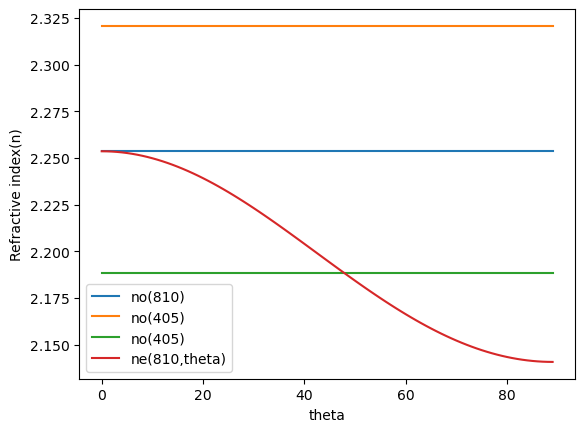

In [178]:
import numpy as np
import matplotlib.pyplot as plt

def calc_no(l):
    # Define the constants
    a1, b1, c1, d1, e1 = 2.259276, 0.01008956, 0.012942625, 13.00522, 400
    l = l / 1000
    no = a1 + (b1 / (l**2 - c1)) + (d1*(l**2) / (l**2 - e1))
    return no

def calc_ne(l):
    # Define the constants
    a2, b2, c2, d2, e2 = 2.132668, 0.008637494, 0.012281043, 3.2279924, 400
    l = l / 1000
    ne = a2 + (b2 / ((l**2) - c2)) + (d2*(l**2) / ((l**2) - e2))
    return ne

def calc_phase_matching_angle(wavelengths):
    # Calculate the refractive indices for the given wavelengths
    ne_values = [calc_ne(l) for l in wavelengths]
    no_values = [calc_no(l) for l in wavelengths]

    # Calculate the phase difference in degrees
    theta = 3 * np.pi / 180  # Convert 3 degrees to radians
    a = ((1 / ((no_values[1]**2) * (np.cos(theta)**2))) - (1 / no_values[0]**2)) / ((1 / ne_values[0]**2) - (1 / no_values[0]**2))
    delta_pm = np.arcsin(np.sqrt(a)) * 180 / np.pi

    # Print the results
    print(f"ne values KDP: {ne_values}")
    print(f"no values KDP: {no_values}")
    print(f"Phase matching angle for KDP: {delta_pm:.2f} degrees")

    # Plot the refractive indices for visualization
    l = np.linspace(wavelengths[1], wavelengths[1], 90)
    y = calc_no(l)
    plt.plot(y, label=f"no({wavelengths[1]})")

    l = np.linspace(wavelengths[0], wavelengths[0], 90)
    v = calc_no(l)
    plt.plot(v, label=f"no({wavelengths[0]})")

    l = np.linspace(wavelengths[0], wavelengths[0], 90)
    z = calc_ne(l)
    plt.plot(z, label=f"no({wavelengths[0]})")

    plt.xlabel('theta')
    plt.ylabel('Refractive index(n)')

    theta = np.linspace(0, 3.14/2, 90)
    s = ((np.cos(theta))**2/no_values[1]**2) + ((np.sin(theta))**2/ne_values[1]**2)
    nee = np.sqrt(1/s)
    plt.plot(nee, label=f"ne({wavelengths[1]},theta)")
    plt.legend()

    plt.show()

# Call the function with desired wavelengths
wavelengths = [405, 810]
calc_phase_matching_angle(wavelengths)


ne values BBO: [1.5671241459050829, 1.5441811980421354]
no values BBO: [1.6922993830562731, 1.6610724058370865]
Phase matching angle for BBO: 29.71 degrees


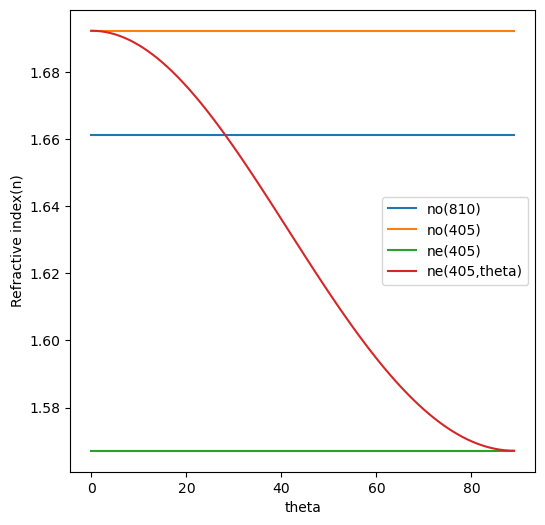

In [181]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_phase_matching_angle(wavelengths):
    """
    Calculates the phase matching angle for BBO crystal for given wavelengths.
    
    Args:
        wavelengths (list): List of two wavelengths in nanometers.
        
    Returns:
        delta_pm (float): Phase matching angle in degrees.
    """
    # Define the constants
    a1, b1, c1, d1 = 2.7405, 0.0184, 0.0179, 0.0155
    a2, b2, c2, d2 = 2.3753, 0.01224, 0.01667, 0.01516

    # Define the functions
    def calc_no(l):
        l = l / 1000
        no = np.sqrt(a1 + (b1) / (l**2 - c1) - d1 * (l**2))
        return no

    def calc_ne(l):
        l = l / 1000
        ne = np.sqrt(a2 + ((b2) / (l**2 - c2)) - d2 * (l**2))
        return ne
    
    # Calculate the refractive indices for the given wavelengths
    ne_values = [calc_ne(l) for l in wavelengths]
    no_values = [calc_no(l) for l in wavelengths]

    # Calculate the phase difference in degrees
    theta = 3 * np.pi / 180  # Convert 3 degrees to radians
    a = ((1 / ((no_values[1]**2) * (np.cos(theta)**2))) - (1 / no_values[0]**2)) / ((1 / ne_values[0]**2) - (1 / no_values[0]**2))
    delta_pm = np.arcsin(np.sqrt(a)) * 180 / np.pi

    # Plot the refractive indices and phase matching angle
    plt.figure(figsize=(6, 6))
    l=np.linspace(wavelengths[1],wavelengths[1], 90)
    y=calc_no(l)
    plt.plot(y, label=f"no({wavelengths[1]})")
    
    l=np.linspace(wavelengths[0],wavelengths[0], 90)
    v=calc_no(l)
    plt.plot(v,label=f"no({wavelengths[0]})")
    
    l=np.linspace(wavelengths[0],wavelengths[0], 90)
    z=calc_ne(l)
    plt.plot(z,label=f"ne({wavelengths[0]})")
    
    theta=np.linspace(0,3.14/2,90)
    s=((np.cos(theta))**2/no_values[0]**2)+((np.sin(theta))**2/ne_values[0]**2)
    nee=np.sqrt(1/s)
    plt.xlabel('theta')
    plt.ylabel('Refractive index(n)')
    plt.plot(nee,label=f"ne({wavelengths[0]},theta)")
    plt.legend()
    
    print(f"ne values BBO: {ne_values}")
    print(f"no values BBO: {no_values}")
    print(f"Phase matching angle for BBO: {delta_pm:.2f} degrees")
    return delta_pm
wavelengths = [405, 810]
delta_pm = calculate_phase_matching_angle(wavelengths)



Pump and Signal/idler wavelengths: [405, 810]
n(e ray) values BBO: [1.5671241459050829, 1.5441811980421354]
n(o ray) values BBO: [1.6922993830562731, 1.6610724058370865]

Minimum value: Type 1  8.491514158492919e-10
Phase matching angle for BBO  [29.70838013]
Minimum value: Type 2  5.000191372062091e-10
Phase matching angle for BBO:Type 2  [43.3613464]


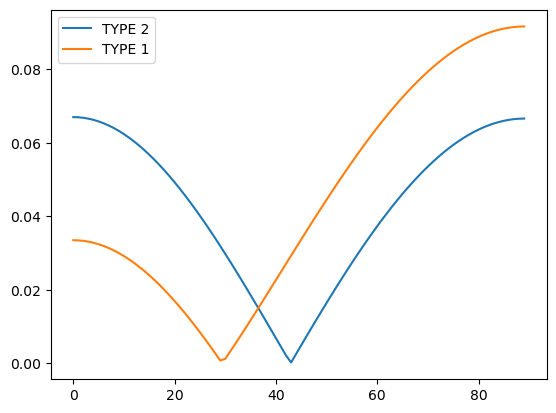

In [180]:
import numpy as nnp
from scipy.optimize import minimize
a1, b1, c1, d1 = 2.7405, 0.0184, 0.0179, 0.0155
a2, b2, c2, d2 = 2.3753, 0.01224, 0.01667, 0.01516
wavelengths = [405, 810]

def calc_no(l):
    l = l / 1000
    return np.sqrt(a1 + (b1) / (l**2 - c1) - d1 * (l**2))
def calc_ne(l):
    l = l / 1000
    return np.sqrt(a2 + ((b2) / (l**2 - c2)) - d2 * (l**2))
# Calculate the refractive indices for the given wavelengths
ne_values = [calc_ne(l) for l in wavelengths]
no_values = [calc_no(l) for l in wavelengths]

print()
def function(theta):
    s = ((np.cos(theta))**2/no_values[0]**2) + ((np.sin(theta))**2/ne_values[0]**2)
    nee = np.sqrt(1/s)
    k = ((np.cos(theta))**2/no_values[1]**2) + ((np.sin(theta))**2/ne_values[1]**2)
    nex = np.sqrt(1/k)
    func=2*nee- (nex*np.cos(3 * np.pi / 180)+ (no_values[1]*np.cos(3 * np.pi / 180)))
    return np.abs(func)

def function2(theta):
    s = ((np.cos(theta))**2/no_values[0]**2) + ((np.sin(theta))**2/ne_values[0]**2)
    nee = np.sqrt(1/s)
    func=nee-(no_values[1]*np.cos(3 * np.pi / 180))
    return np.abs(func)


x0 = 1
# Call the minimize function
result = minimize(function, x0)
result2 = minimize(function2, x0)

# Extract the minimum value and the corresponding argument
min_value = result.fun
min_argument = result.x * 180 / np.pi
min_value2 = result2.fun
min_argument2 = result2.x * 180 / np.pi


theta=np.linspace(0,3.14/2,90)
plt.plot(function(theta),label= 'TYPE 2')
theta=np.linspace(0,3.14/2,90)
plt.plot(function2(theta),label= 'TYPE 1')
plt.legend()

# Print the results
print(f"Pump and Signal/idler wavelengths: {wavelengths}")
print(f"n(e ray) values BBO: {ne_values}")
print(f"n(o ray) values BBO: {no_values}")
print('')
print("Minimum value: Type 1 ", min_value2)
print("Phase matching angle for BBO ", min_argument2)
print("Minimum value: Type 2 ", min_value)
print("Phase matching angle for BBO:Type 2 ", min_argument)

